<a href="https://colab.research.google.com/github/analyst-rhie/Kaggle/blob/main/Stock_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Analysis
* 주식 마트의 데이터를 이번 주제에서 다뤄보겠다. 중점적으로 다룰 내용은  
 1. 주식 정보를 판다스로 어떻게 사용할 것인지
 2. 어떻게 주식 정보를 시각화할것인지 
 3. 마지막으로 과거 퍼포먼스를 바탕으로주식 리스크를 몇가지 방법으로 분석해 보겠다.또한 미래 주식을 LSTM방법을 통해 예측해 보겠다.

### 중점적으로 다룰 질문들
  1. 시간에 따라 주식이 어떤 변화가 있었나?
  2. 주식의 하루 평균 수익률은 얼마인가?
  3. 다양한 주식의 이동평균은 얼마 였는가?
  4. 다른 종목들 간의 상관관계는 무엇인가?
  5. 특정 주식에 투자함으로써 얼마나 많은 리스크를 얻는가?
  6. 향후 주가 동향 예측은 어떻게 할 수 있는가?(LSTM을 이용한 애플사의 종가 주가 예측)


### 1. 시간에 따라 주식이 어떤 변화가 있었나?
* 판다스로 주식정보를 요청하는 것을 다뤄보고 주식의 기본 변수들을 어떻게 분석하는지 살펴보겠다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 6.5 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=f5445987d58d40cb86438452c14d0d0cb81da7a681f144a0ff961dfef31529c2
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [4]:
!pip3 install pandas_datareader

In [5]:
import pandas as pd
from pandas_datareader import data as pdr
from datetime import datetime # 타임 스탬프 패키지
import yfinance as yf



yf.pdr_override()
tech_list = ['AAPL','GOOG','MSFT','AMZN'] #주식 기업 약어

end = datetime.now()
start = datetime(end.year -1, end.month, end.day) # 지금으로 부터 1년전 

for stock in tech_list :
  globals()[stock] = pdr.get_data_yahoo(stock, start=start, end=end)
# globals로 하면 tech_list내 원소를 개체로 한 전역 심볼로 값을 저장함.
# 즉 AAPL, GOOG, MSFT, AMZN 4개의 dataframe이 만들어 짐

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [89]:
AAPL

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-14,114.720001,115.930000,112.800003,115.360001,114.622765,140150100
2020-09-15,118.330002,118.830002,113.610001,115.540001,114.801620,184642000
2020-09-16,115.230003,116.000000,112.040001,112.129997,111.413406,154679000
2020-09-17,109.720001,112.199997,108.709999,110.339996,109.634850,178011000
2020-09-18,110.400002,110.879997,106.089996,106.839996,106.157211,287104900
...,...,...,...,...,...,...
2021-09-07,154.970001,157.259995,154.389999,156.690002,156.690002,82278300
2021-09-08,156.979996,157.039993,153.979996,155.110001,155.110001,74420200
2021-09-09,155.490005,156.110001,153.949997,154.070007,154.070007,57305700


In [7]:
# 만들어진 4개의 Dataframe 하나로 합치기 : df 데이터프레임
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE","GOOGLE","MICROSOFT","AMAZON"]

for company, com_name in zip(company_list, company_name) :
  company["company_name"] = com_name
df = pd.concat(company_list, axis=0)


In [8]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,129.807739,131.226667,128.332619,129.804405,129.397765,1.010294e+08
std,11.554975,11.450311,11.645269,11.571741,11.736083,3.692116e+07
min,104.540001,110.190002,103.099998,106.839996,106.157211,4.639770e+07
25%,121.212500,122.890001,119.642502,121.167501,120.688868,7.609535e+07
50%,128.385002,129.705002,126.785000,127.889999,127.467182,9.250790e+07
75%,136.197498,137.332500,134.447495,136.420002,136.069588,1.151239e+08
max,156.979996,157.259995,154.389999,156.690002,156.690002,2.871049e+08


In [9]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-09-15 to 2021-09-14
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


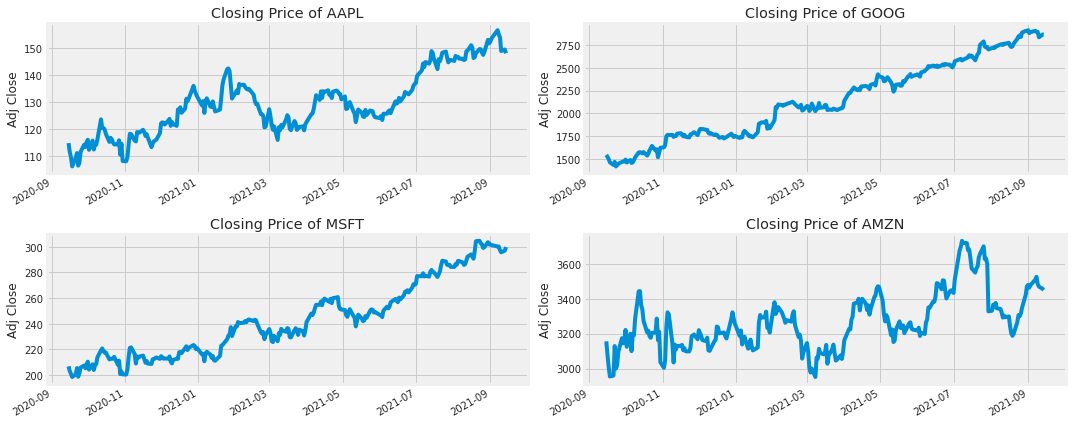

In [11]:
# Adjusted Closing Price(조정종가) : 장이 마감 후 회사측의 영향을 계산해서 반영
# 조정종가의 역할 : 투자자로 하여금 한정된 자산에서 투자하였을 때 얼마만큼을 벌 수 있는지 보여주는 것.
plt.figure(figsize=(15,6))
plt.subplots_adjust(top=1.25, bottom = 1.2)

for i, company in enumerate(company_list,1):
  plt.subplot(2,2,i)
  company['Adj Close'].plot()
  plt.ylabel('Adj Close')
  plt.xlabel(None)
  plt.title(f"Closing Price of {tech_list[i -1]}")

plt.tight_layout()

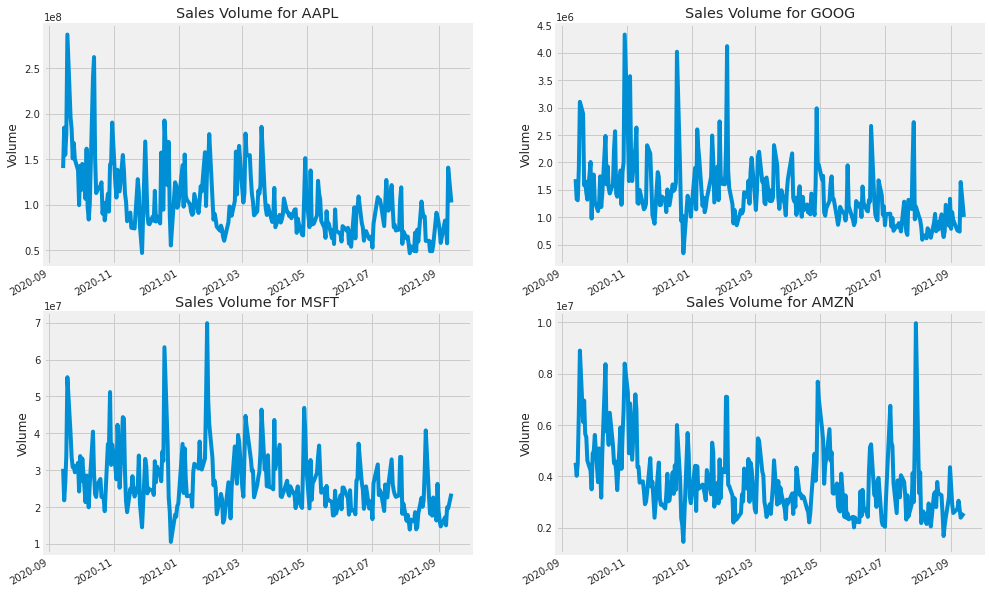

In [26]:
# 각날의 거래된 주식의 총양을 그려보자.
plt.figure(figsize=(15,7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list,1):
  plt.subplot(2,2,i)
  company["Volume"].plot()
  plt.ylabel("Volume")
  plt.xlabel(None)
  plt.title(f"Sales Volume for {tech_list[i-1]}")


### 2. 다양한 주식의 이동평균은 얼마 였는가?
* 이동평균선을 보는 이유
  * 이동평균선의 목적은 주식 시세의 예측 지표. 주가나 매매량의 과거 평균 수준과 현재를 비교하여 장래의 움직임을 미리 알아보는 데에 사용한다.

  * 주로 현재의 추세를 알아보기 위한 지표로 활용되며 주가는 흡사 관성을 가지고 있는 듯 하여 이동평균선이 상승하고 있다면 상승장일 확률이 높고 이동평균선이 하락하고 있다면 하락장일 확률이 높다.

  * 이동평균선의 모습을 보며 향후 주가의 흐름을 예측해보고자 하는 것이 목표다.

In [12]:
  # 10일 간격, 20일 간격, 50일 간격 이동 평균 계산
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE","GOOGLE","MICROSOFT","AMAZON"]

ma_day = [10,20,50]
for i in ma_day:
    for j, name in zip(company_name, company_list):
        name[f"MA for {i} days"] = df.loc[df.company_name==j,"Adj Close"].rolling(i).mean()

,Open,High,Low,Close,Adj Close,Volume,company_name,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,,
2020-09-15,208.419998,209.779999,206.929993,208.779999,206.881653,21823900,MICROSOFT,NaN,NaN,NaN
2020-09-16,210.619995,210.649994,204.639999,205.050003,203.185562,26328100,MICROSOFT,NaN,NaN,NaN
2020-09-17,200.050003,204.330002,199.960007,202.910004,201.065033,34011300,MICROSOFT,NaN,NaN,NaN
2020-09-18,202.800003,203.649994,196.250000,200.389999,198.567947,55225300,MICROSOFT,NaN,NaN,NaN
2020-09-21,197.190002,202.710007,196.380005,202.539993,200.698380,39839700,MICROSOFT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-09-08,299.779999,300.609985,297.470001,300.209991,300.209991,15046800,MICROSOFT,301.079999,298.221774,288.286180
2021-09-09,300.820007,302.140015,297.000000,297.250000,297.250000,19927000,MICROSOFT,300.603998,298.764188,288.813552
2021-09-10,298.420013,299.920013,295.380005,295.709991,295.709991,19619400,MICROSOFT,300.265997,299.086874,289.320104


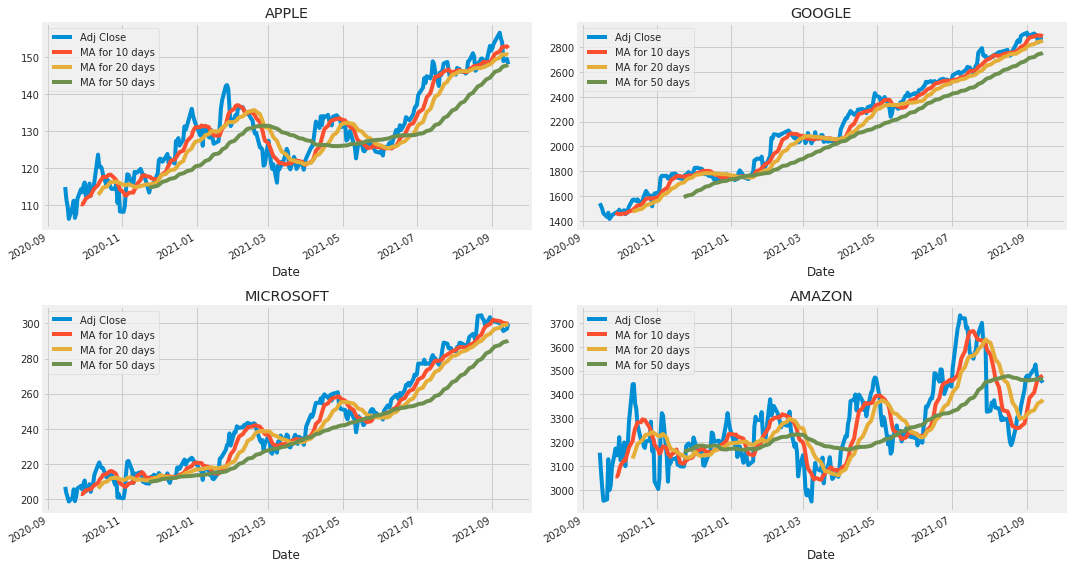

In [20]:
fig, axes = plt.subplots(nrows=2, ncols =2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[["Adj Close","MA for 10 days","MA for 20 days", "MA for 50 days"]].plot(ax=axes[0,0])
axes[0,0].set_title("APPLE")

GOOG[["Adj Close","MA for 10 days","MA for 20 days", "MA for 50 days"]].plot(ax=axes[0,1])
axes[0,1].set_title("GOOGLE")

MSFT[["Adj Close","MA for 10 days","MA for 20 days", "MA for 50 days"]].plot(ax=axes[1,0])
axes[1,0].set_title("MICROSOFT")

AMZN[["Adj Close","MA for 10 days","MA for 20 days", "MA for 50 days"]].plot(ax=axes[1,1])
axes[1,1].set_title("AMAZON")

fig.tight_layout()

### 3. 주식의 하루 평균 수익률은 얼마인가?

* 기본적인 분석을 1,2에서 하였고 조금 더 깊게 들어가 보겠다. 주식 리스크 분석을 진행하면서 주식의 일별 변화량을 자세히 봐야 한다. 
  * 주식의 절대 가치뿐 아니라 매일 변동되는 주식에 대해 자세히 살펴보기 위해 애플 주식의 일일 수익률을 살펴보기 위해 pandas를 사용해 보겠다.
  * 수익률 함수 : pct_change()
    * 시점별 수익률 = 
$ \frac {(현재 시점 값) - (이전 시점 값)} {이전 시점 값} $
    * 각 시점별 수익률을 계산한다.

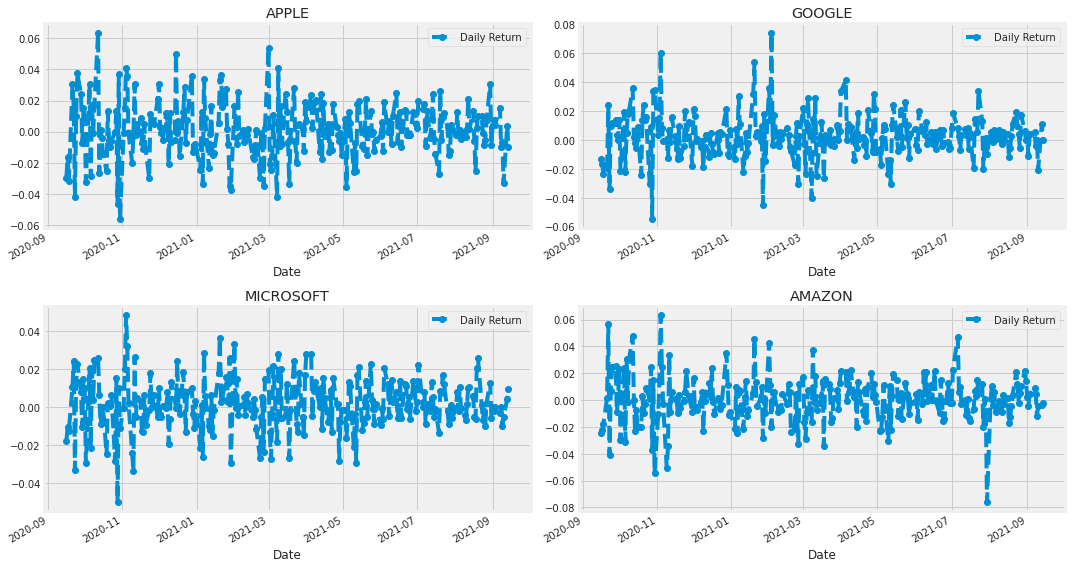

In [23]:
# 일별 % 변화량을 찾기 위해 pct_change를 사용하겠다.
df['Daily Return'] = df['Adj Close'].pct_change()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

for i in ma_day:
    for j, name in zip(company_name, company_list):
        name["Daily Return"] = df.loc[df.company_name==j,"Adj Close"].pct_change()


AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

* 전반적인 히스토그램을 사용한 일 평균 수익을 살펴보자.
* seaborn으로 히스토그램과 kde plot을 그려보겠다.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

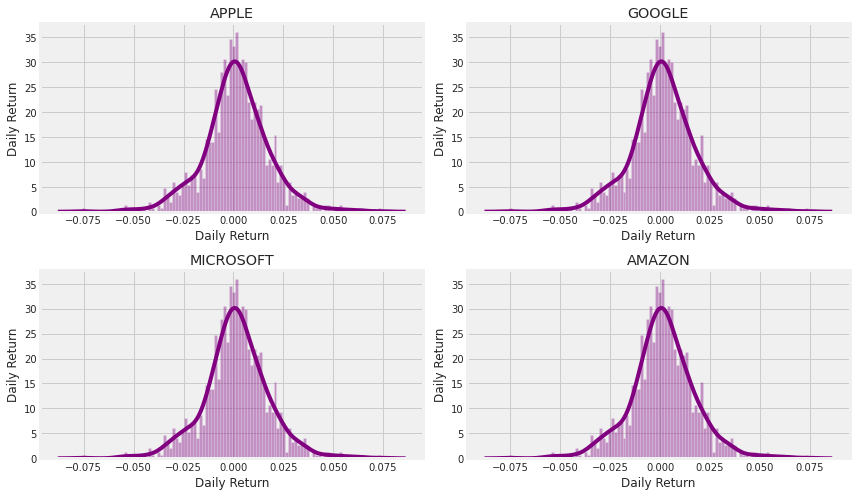

In [27]:
df2 = pd.concat(company_list, axis=0)

plt.figure(figsize=(12,7))
for i, company in enumerate(company_list, 1) :
  plt.subplot(2,2,i)
  sns.distplot(df2['Daily Return'].dropna(), bins=100, color='purple')
  plt.ylabel("Daily Return")
  plt.title(f'{company_name[i-1]}')
plt.tight_layout()

### 4. 주식 종가 가격 사이의 상관관계는 얼마일까?

* 애플, 마이크로소프트, 구글, 아마존의 수익률을 분석하려면 어떻게 해야할까? 

In [29]:
#모든 종가 가격만 가져오기

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']
closing_df.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2020-09-15,114.801620,3156.129883,1541.439941,206.881653
2020-09-16,111.413406,3078.100098,1520.900024,203.185562
2020-09-17,109.634850,3008.729980,1495.530029,201.065033
2020-09-18,106.157211,2954.909912,1459.989990,198.567947
2020-09-21,109.376511,2960.469971,1431.160034,200.698380


* 모든 주식에 대한 일별 수익을 보자.

In [30]:
tech_rets = closing_df.pct_change()
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2020-09-15,NaN,NaN,NaN,NaN
2020-09-16,-0.029514,-0.024723,-0.013325,-0.017866
2020-09-17,-0.015964,-0.022537,-0.016681,-0.010436
2020-09-18,-0.031720,-0.017888,-0.023764,-0.012419
2020-09-21,0.030326,0.001882,-0.019747,0.010729


* 두개 주식의 상관분석을 진행하겠다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


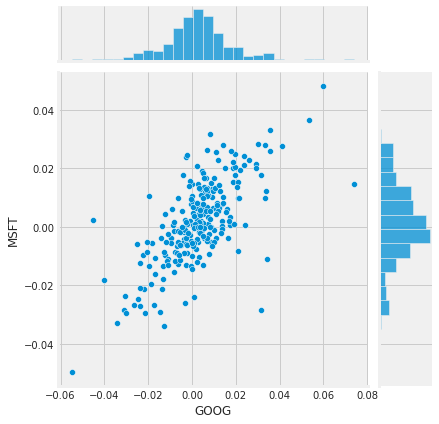

In [31]:
sns.jointplot('GOOG','MSFT', tech_rets, kind='scatter')

* 만약 두 종목이 서로 완벽하게 상관되어 있다면, 그것의 일일 수익률에 비례하는 선형 관계가 발생해야 함을 알 수 있다.

* Seaborn과 Panda는 기술 주식 거래 목록에 있는 가능한 모든 조합에 대해 이 비교 분석을 쉽게 반복할 수 있도록 한다. sns.pairplot()을 사용하여 이 그림을 자동으로 생성 해보자.

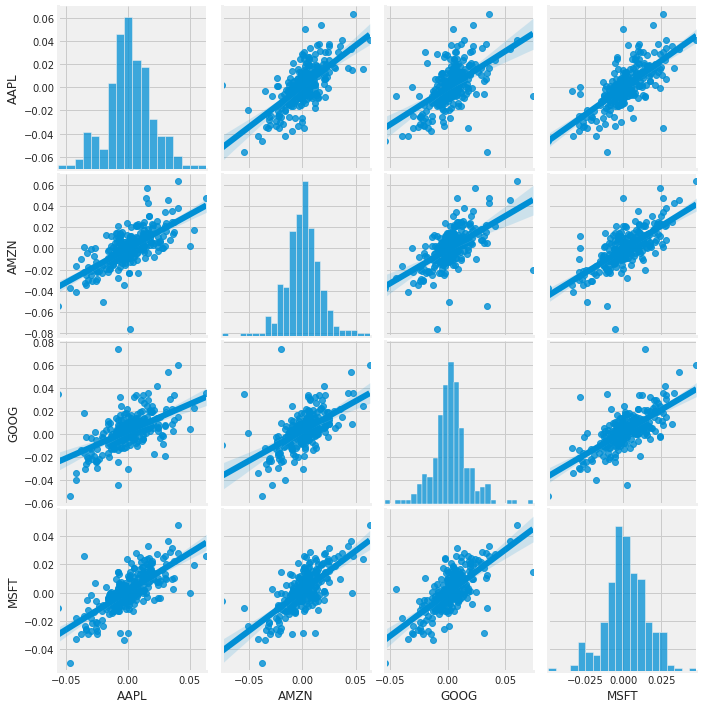

In [32]:
sns.pairplot(tech_rets, kind='reg')

* 모든 주식 간 매일 수익에 모든 연간 관계를 볼 수 있다. 간단히 살펴보면 구글과 아마존 일상 거래의 수익 간에 재미 있는 관계를 보여 준다. 이 관계에 대해 좀 더 살펴보는 것도 좋은 방법이 될 수 있다.

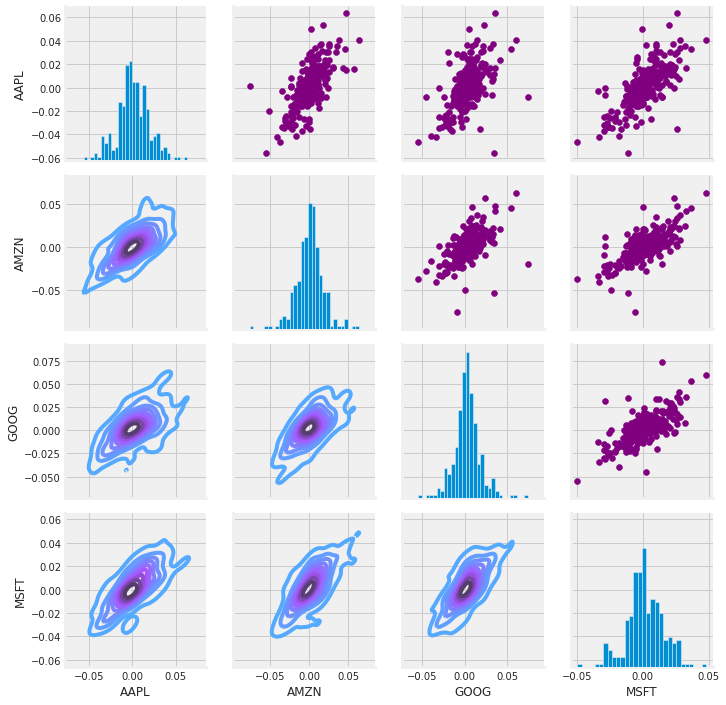

In [34]:
# return_fig 개체 이름으로 PairdGrid()를 지정한다.
return_fig = sns.PairGrid(tech_rets.dropna())
# 산점도의 위쪽 삼각형 부분
return_fig.map_upper(plt.scatter, color='purple') 
# 산점도의 아랫쪽 삼각형 부분
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
# 산점도의 대각선 부분
return_fig.map_diag(plt.hist, bins=30)

* 상관관계의 수치적 표현

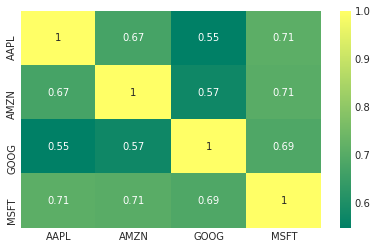

In [35]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

### 5. 특정 주식에 투자함으로써 얼마나 많은 리스크를 얻게 될까?
* 위험을 수량화하는 방법은 여러가지가 있다. 일일 수익률에 대해 수집한 정보를 사용하는 가장 기본적인 방법은 기대수익률과 일일 수익률의 표준편차를 비교하는 것이다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  # Remove the CWD from sys.path while we load stuff.


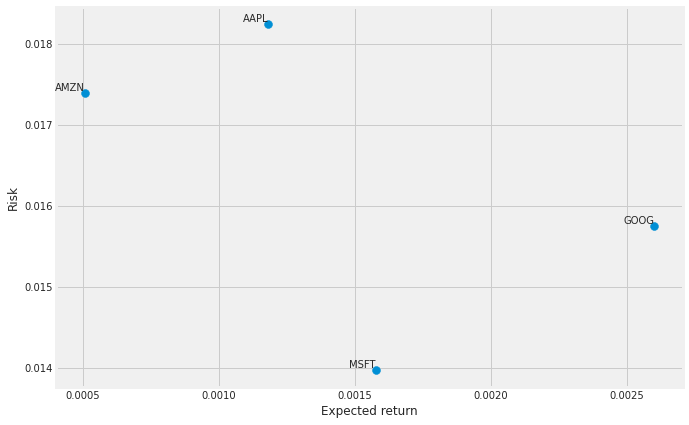

In [46]:
rets = tech_rets.dropna()
area = np.pi*20

plt.figure(figsize=(10,7))
plt.scatter(rets.mean(),rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
  plt.annotate(label, xy=(x,y),  textcoords = 'offset points', ha='right', va='bottom') # 

### 6. AAPLE 사의 종가 예측해보기

In [56]:

end = datetime.now()
start = datetime(end.year -9, end.month, end.day) # 지금으로 부터 1년전 

df = pdr.get_data_yahoo('AAPL', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


Text(0, 0.5, 'Close Price USD ($)')

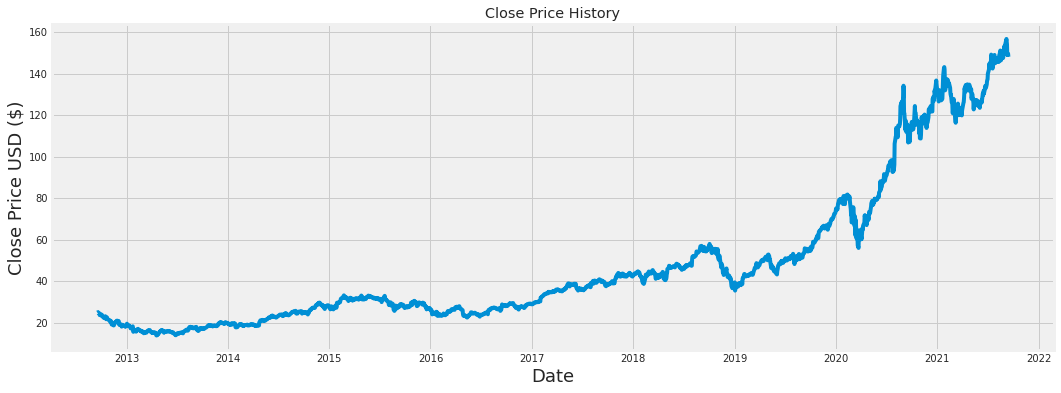

In [57]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

In [70]:
# close 변수만 가진 df 만들기
data = df.loc[:,'Close']
# array 문으로 변환
dataset = data.values

In [59]:
# 훈련 모델의 행 수 얻기
training_data_len = int(np.ceil(len(dataset)*.95))
training_data_len

2150

In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset.reshape(-1,1))

scaled_data

array([[0.0773746 ],
       [0.07790752],
       [0.07795506],
       ...,
       [0.94591659],
       [0.94997986],
       [0.93996177]])

In [65]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

# x_train과 y_train을 numpy arrays로 바꾸기
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


[array([0.0773746 , 0.07790752, 0.07795506, 0.07710437, 0.07745215,
       0.07512528, 0.07080932, 0.06871765, 0.07275588, 0.06919803,
       0.06726898, 0.06774936, 0.0702864 , 0.06912297, 0.06556761,
       0.06195972, 0.06137926, 0.06264527, 0.05944019, 0.05984302,
       0.06110654, 0.06486705, 0.06357101, 0.06057611, 0.05487154,
       0.06092389, 0.05575224, 0.05662043, 0.05479647, 0.05341036,
       0.05123862, 0.05154386, 0.0466049 , 0.04856147, 0.04811861,
       0.04190113, 0.03683455, 0.03916393, 0.03810558, 0.03812309,
       0.03661688, 0.03379962, 0.03431504, 0.04383518, 0.0426292 ,
       0.04282687, 0.04527883, 0.04978996, 0.0486015 , 0.04814114,
       0.04974741, 0.0487266 , 0.04895428, 0.0463672 , 0.03709477,
       0.03920897, 0.03570866, 0.03485047, 0.03774529, 0.03714731])]
[0.03481793604791117]

[array([0.0773746 , 0.07790752, 0.07795506, 0.07710437, 0.07745215,
       0.07512528, 0.07080932, 0.06871765, 0.07275588, 0.06919803,
       0.06726898, 0.06774936, 0.07

In [68]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
#LSTM 모델 빌드
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

#모델 Train
model.fit(x_train, y_train, batch_size=1, epochs=1)

2090/2090 [==============================] - 67s 31ms/step - loss: 0.0010


In [74]:
# 테스트 데이터셋 만들기
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# numpy로 변환
x_test = np.array(x_test)

# 데이터 형태 변환
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# 주식가격 모델예측
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

13.30857175117983

In [72]:
training_data_len

2150

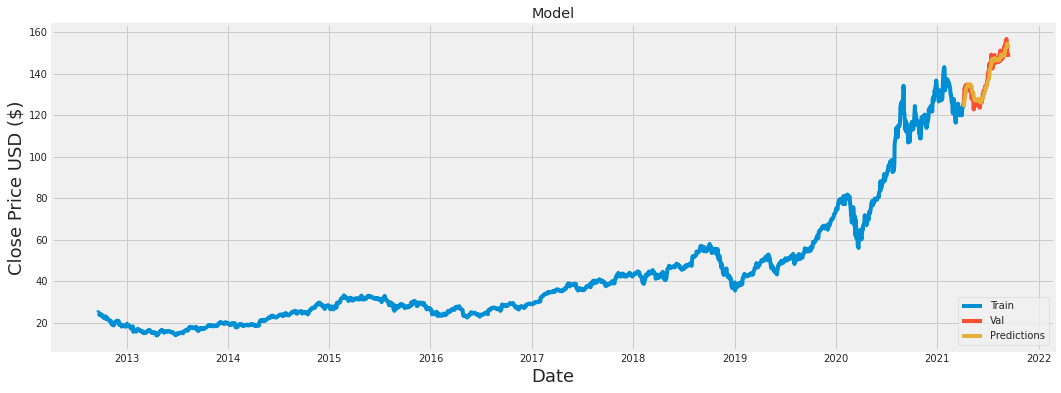

In [93]:
# 데이터플롯
train = data[:training_data_len]
valid = pd.DataFrame(data[training_data_len:])
valid['Predictions'] = predictions
# 시각화
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train)
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [94]:
valid

,Close,Predictions
Date,,
2021-04-06,126.209999,123.903618
2021-04-07,127.900002,124.967209
2021-04-08,130.360001,126.180901
2021-04-09,133.000000,127.659943
2021-04-12,131.240005,129.434875
...,...,...
2021-09-08,155.110001,153.554092
2021-09-09,154.070007,154.207092
2021-09-10,148.970001,154.405563
